Outcome Columns: Index(['Diagnosis', 'FEV1', 'FEV1/FVC', 'FEF2575', 'FEV1_pred',
       'FEV1/FVC_pred', 'FEF2575_pred', 'R5', 'R5_20', 'R20', 'X5', 'AX', 'TV',
       'R5_z_score', 'R5_20_z_score', 'R20_z_score', 'X5_z_score',
       'AX_z_score'],
      dtype='object')
Info Columns: Index(['ID', 'Trial', 'Age', 'Sex', 'Height', 'Weight', 'OralCavity', 'OPJ',
       'Glottis', 'Carina'],
      dtype='object')
# of total CSA samples: 1058
# of total subjects: 340


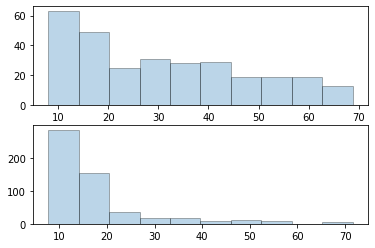

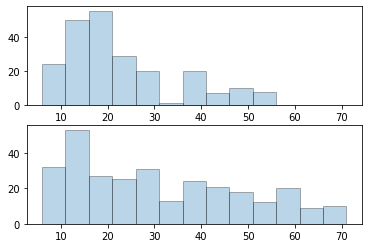

# of valid CSA samples w/o NaN: 687
# of subjects w/ valid CSA samples: 268
# of healthy samples: 295
# of asthma sampels: 229


In [3]:
from data.aware import AwareDataset, AwareSplitter
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

dataset = AwareDataset(
    csv_data = 'data/exhale_data_v8_ave.csv',
    csv_outcome = 'data/exhale_outcome_v8_ave.csv',
    csv_info = 'data/exhale_verbose_v8_ave.csv',
    root_dir = 'data/',
    target_classes = [0,1,2],
    partially_remove = True,
    normalize=False
)

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(dataset.data_out['Diagnosis']), 
    y=dataset.data_out['Diagnosis']
)

[  4   5   6   7   8   9  10  11  72  73  74  81  82  83  84  91  92  96
  97  98 103 104 105 106 114 115 116 117 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 173 174 175 176 177 192 193 194 196 197 198 220 221 222 223 224 225
 226 227 228 231 232 233 258 259 260 279 280 281 282 287 288 289 302 303
 304 315 316 317 318 350 351 352 353 354 431 432 433 434 435 436 437 438
 462 463 464 495 496 497 501 502 503 506 507 508 509 510 511 512 513 520
 521 522 523 524 525 526 534 535 536 537 538 539 540 541 542 549 550 596
 597 598 599 608 609 610 623 624 625 627 642 643 644 666 667 668 671 672
 673]
[  2.     3.41  87.4    3.61 111.    98.    97.     3.78  -0.2    3.98
  -1.01   2.08   0.63   1.45  -1.6    1.16  -0.12    nan]


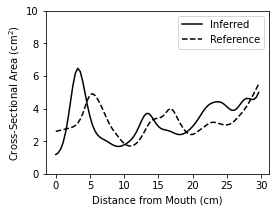

[ 2.    2.69 86.5   3.34 92.   97.   94.    5.24  1.12  4.12 -2.25 16.5
  1.09  0.9   0.71  0.87 -2.89   nan]


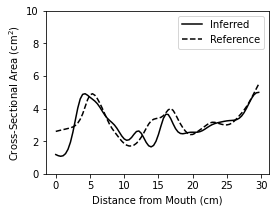

[ 2.    1.81 70.2   1.05 59.   82.   31.    4.7   1.2   3.49 -2.2  17.18
  1.05  1.98  4.16  0.49 -2.44  3.01]


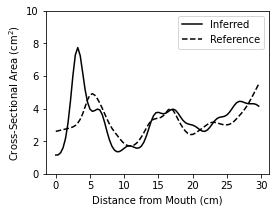

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/reference.csv',header=None)
reference = df.to_numpy()
print(dataset.data_info.index[dataset.data_out.iloc[:, 0]==2].to_numpy())
def my_plot(k):
    inputs, masks, targets, info = dataset[k]
    print(targets)
    t = np.arange(0,len(inputs))/48000*34300/2
    t_ref = np.arange(0,len(reference))/48000*34300/2
    plt.figure(figsize=(4,3))
    plt.plot(t,inputs,'k')
    plt.plot(t_ref,reference,'--k')
    plt.xlabel('Distance from Mouth (cm)')
    plt.ylabel('Cross-Sectional Area (cm$^2$)')
    plt.ylim(bottom=0,top=10)
    plt.legend(['Inferred','Reference'])
    plt.show()
my_plot(96)
my_plot(153)
my_plot(350)
# my_plot(20)
# my_plot(68)
# my_plot(110)


Case 1: 0,1,2

Case 2: 40,77,265,20,68,110 (28,44,190)

Case 3: 105,514